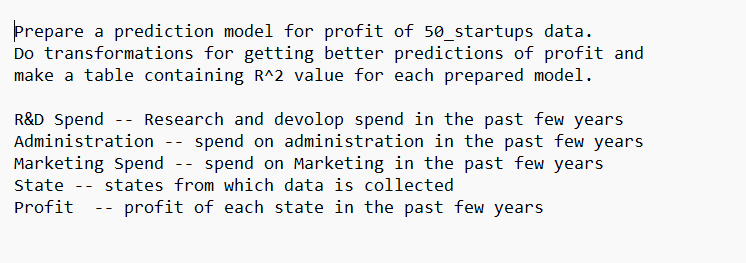

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No null values

In [6]:
df.drop("State", axis = 1, inplace=True)
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [7]:
df1 = df.rename({'R&D Spend':'RD', 'Marketing Spend' : 'Mrkt', 'Administration' : 'Adms','Profit' : 'Prft'}, axis=1)

In [8]:
# checking duplicate values
df1[df1.duplicated()] 

,RD,Adms,Mrkt,Prft


No duplicate values in dataset

# Correlation matrix

In [9]:
df1.corr()

,RD,Adms,Mrkt,Prft
RD,1.000000,0.241955,0.724248,0.972900
Adms,0.241955,1.000000,-0.032154,0.200717
Mrkt,0.724248,-0.032154,1.000000,0.747766
Prft,0.972900,0.200717,0.747766,1.000000


For profit and RD the value is 0.97, so we can say there is strong correlation between profit and RD.


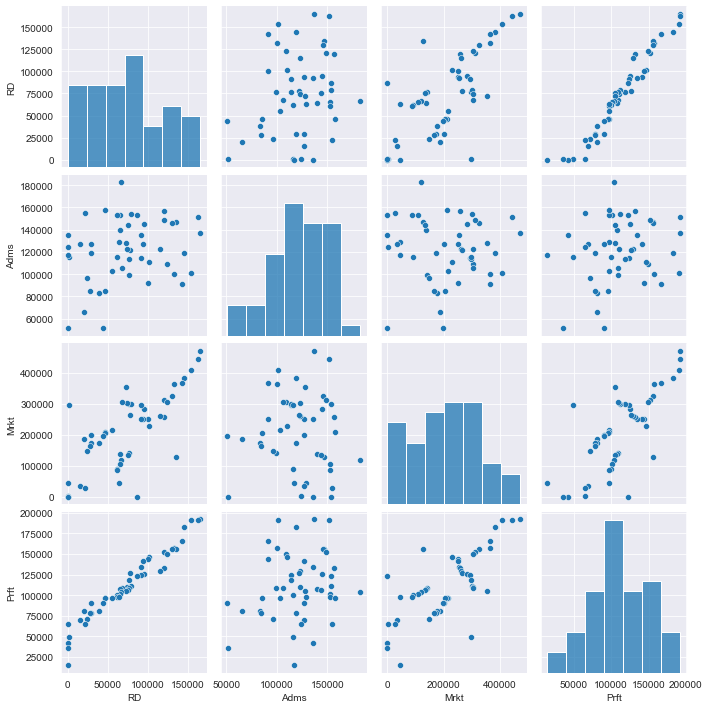

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Model Buliding

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('Prft~RD+Mrkt+Adms',data=df1).fit()

#### Model Testing

In [12]:
# Coefficients
model.params

Intercept    50122.192990
RD               0.805715
Mrkt             0.027228
Adms            -0.026816
dtype: float64

In [13]:
# t values and p values

print("t Values are :\n", model.tvalues,'\n',"p Values are :\n", model.pvalues)


t Values are :
 Intercept     7.626218
RD           17.846374
Mrkt          1.655077
Adms         -0.525507
dtype: float64 
 p Values are :
 Intercept    1.057379e-09
RD           2.634968e-22
Mrkt         1.047168e-01
Adms         6.017551e-01
dtype: float64


Here we can see p values for Adms and Mrkt > 0.05, Hence we build SLR and MLR for variables Adms and Mrkt.

In [14]:
# Coefficient of determination: R Squared values

print("R squared value is:\n", model.rsquared,'\n', "R squared_adjacent value is:\n",  model.rsquared_adj)


R squared value is:
 0.9507459940683246 
 R squared_adjacent value is:
 0.9475337762901719


R squared adjacent value is = 94.75% , Hence we can say model is really good.

# SLR Model


#### Building SLR and MLR models for variables "Adms" and "Mrkt"

In [15]:
#For Adms

ml_p=smf.ols('Prft~Adms',data = df1).fit()  


In [16]:
#t and p-Values

print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    3.040044
Adms         1.419493
dtype: float64 
 P values are: 
 Intercept    0.003824
Adms         0.162217
dtype: float64


In [17]:
#For Mrkt 

ml_p=smf.ols('Prft~Mrkt',data = df1).fit()  


In [18]:
#t and p-Values

print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    7.808356
Mrkt         7.802657
dtype: float64 
 P values are: 
 Intercept    4.294735e-10
Mrkt         4.381073e-10
dtype: float64


In [19]:
#For Adms and Mrkt

ml_p=smf.ols('Prft~Adms+Mrkt',data = df1).fit()  


In [20]:
#t and p-Values

print("T values are:\n", ml_p.tvalues, '\n',"P values are: \n",  ml_p.pvalues)  

T values are:
 Intercept    1.142741
Adms         2.467779
Mrkt         8.281039
dtype: float64 
 P values are: 
 Intercept    2.589341e-01
Adms         1.729198e-02
Mrkt         9.727245e-11
dtype: float64


## VIF

In [21]:
# Excluding one variable and find VIF for each variables.
rsq_RD = smf.ols('RD~Mrkt+Adms', data = df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_Mrkt = smf.ols('Mrkt~RD+Adms', data = df1).fit().rsquared
vif_Mrkt = 1/ (1-rsq_Mrkt)
rsq_Adms = smf.ols('Adms~Mrkt+RD', data = df1).fit().rsquared
vif_Adms = 1/(1-rsq_Adms)

d = {'Variable': ['RD','Mrkt','Adms'], 'VIF': [vif_RD,vif_Mrkt,vif_Adms]}
d1 = pd.DataFrame(d)
print(d1)

  Variable       VIF
0       RD  2.468903
1     Mrkt  2.326773
2     Adms  1.175091


VIF of all the variables < 20 , No collinearity.

# Residual Analysis


##### Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [22]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [23]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q Plot of residuals')

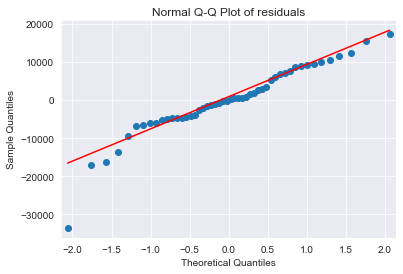

In [24]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residuals")

In [25]:
list(np.where(model.resid<-30000))
# outlier value exists below -3000 so that we use (model.resid<-30000)

[array([49], dtype=int64)]

#### Residual plot for Homoscedasticity or Heteroscedasticity

In [26]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [27]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
get_standardized_values(df1)

,RD,Adms,Mrkt,Prft
0,1.996146,0.555117,2.132295,1.990990
1,1.936203,1.071924,1.904267,1.979335
2,1.736731,-0.720938,1.610180,1.960934
3,1.539157,-0.095396,1.407916,1.758771
4,1.489812,-1.069066,1.268648,1.344094
5,1.266937,-0.768437,1.241605,1.115920
6,1.326598,0.922779,-0.681234,1.094370
7,1.232543,0.863216,0.922817,1.085192
8,1.020013,0.977033,0.822536,0.997344
9,1.080846,-0.452051,0.768307,0.936514


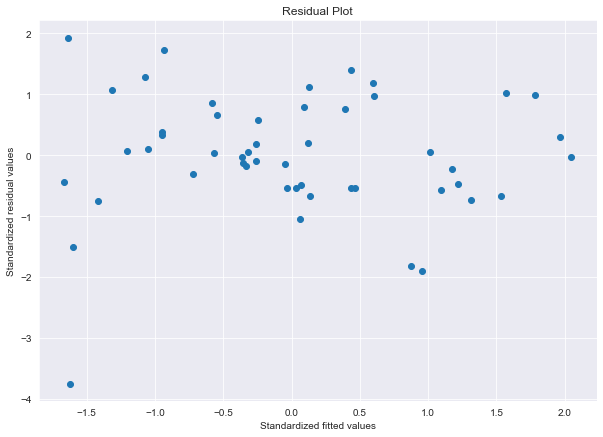

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

### Residual Vs Regressors

eval_env: 1


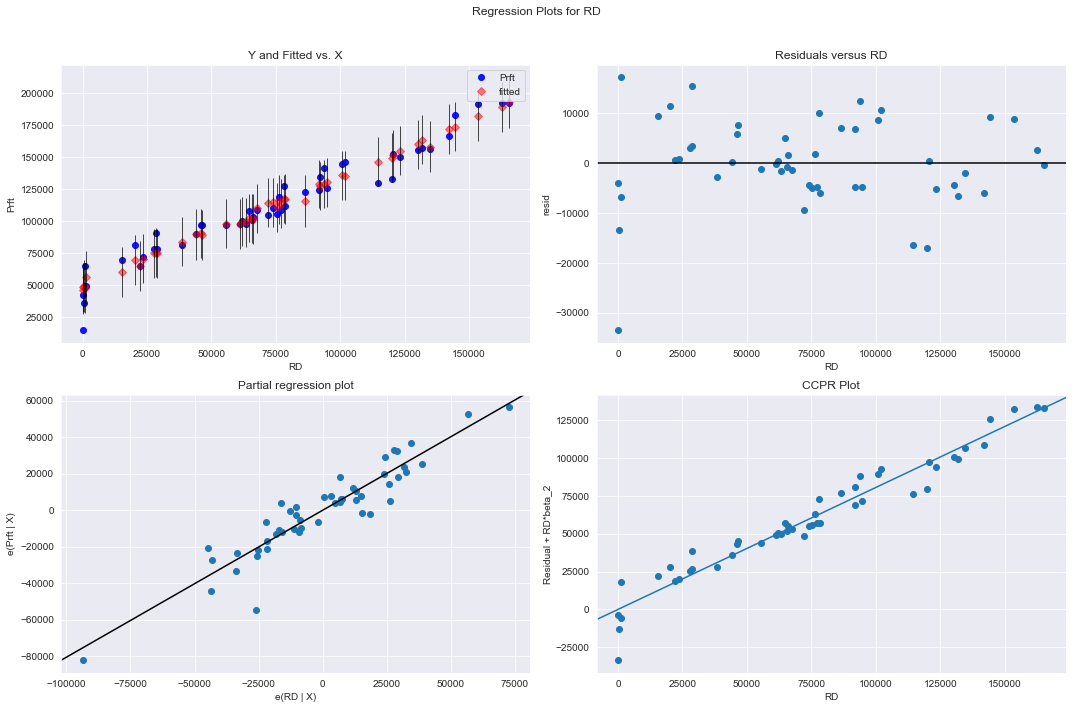

In [29]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"RD", fig = fig)
plt.show()

eval_env: 1


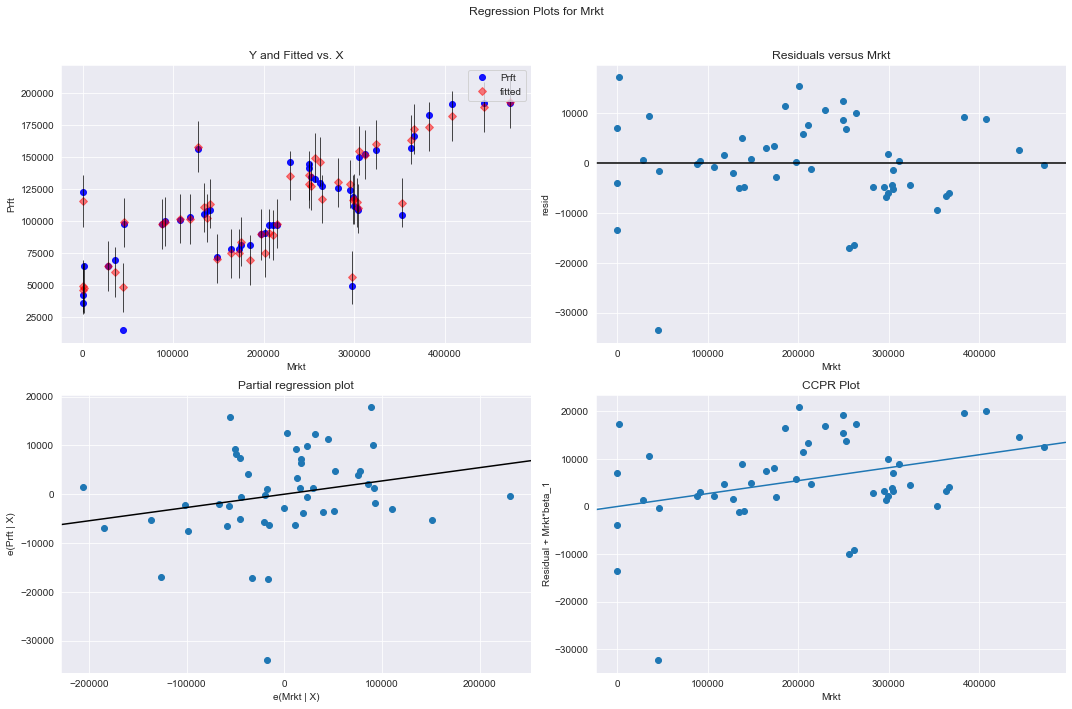

In [30]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model, "Mrkt", fig = fig)
plt.show()

eval_env: 1


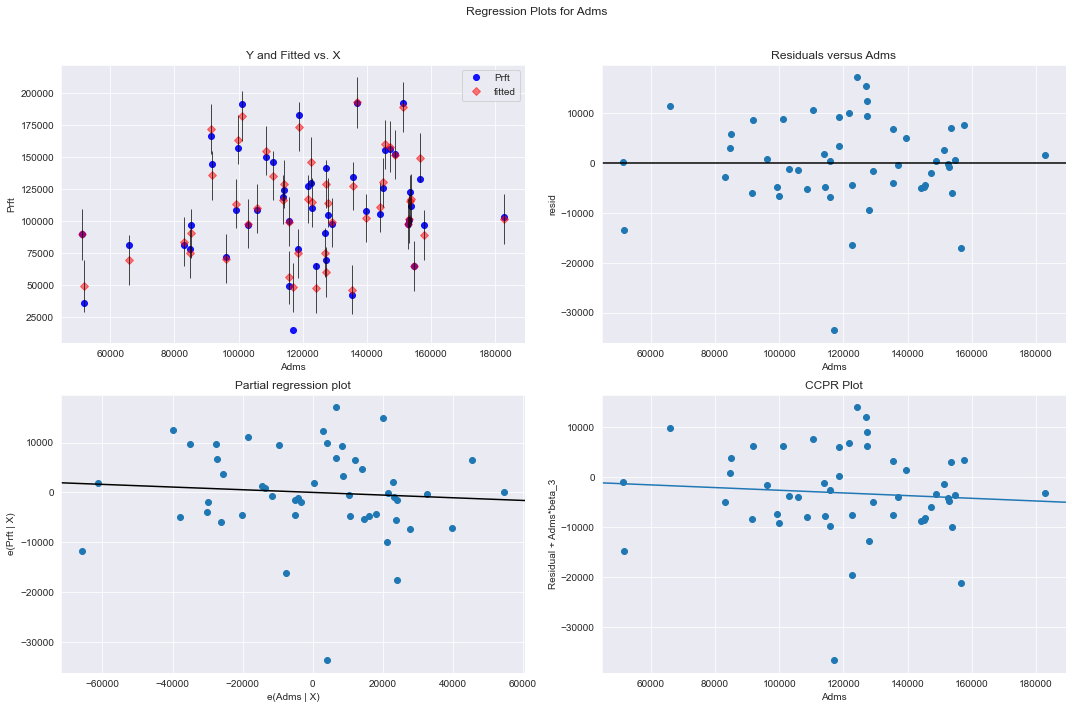

In [31]:
fig = plt.figure(figsize = (15,10))
fig =  sm.graphics.plot_regress_exog(model, "Adms", fig = fig) 
plt.show()

### Cook's Distance

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

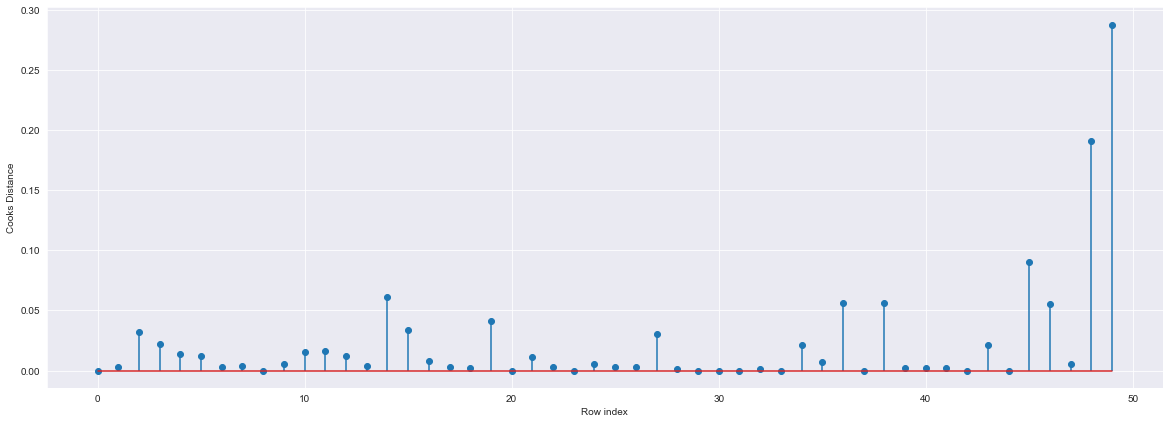

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

Index and value of influencer where c is more than .5


In [35]:
df1.shape

(50, 4)

In [36]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

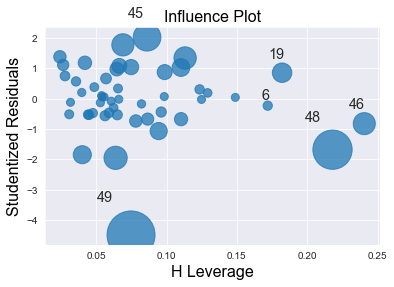

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

#y=[i for i in range(-2,8)]
#x=[leverage_cutoff for i in range(10)]
#plt.plot(x,y,'r+')
plt.show()

From the above plot, Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

In [38]:
df1[df1.index.isin([30])]

,RD,Adms,Mrkt,Prft
30,61994.48,115641.28,91131.24,99937.59


In [39]:
df2=df1.drop(df1.index[30], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2

,RD,Adms,Mrkt,Prft
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Build Model

In [40]:
#Excluding variable "Mrkt" and generate R-Squared and AIC values

final_Adms = smf.ols('Prft~RD+Adms',data = df2).fit()

In [41]:
(final_Adms.rsquared, final_Adms.aic, final_Adms.bic)

(0.9477813451356258, 1039.5183398920226, 1045.1938007863546)

In [42]:
#Excluding variable "Adms" and generate R-Squared and AIC values
final_Mrkt= smf.ols('Prft~RD+Mrkt',data = df2).fit()

In [43]:
(final_Mrkt.rsquared, final_Mrkt.aic, final_Mrkt.bic)

(0.9503671289055595, 1037.0298030569402, 1042.7052639512722)

After comparing above R-Squared and AIC values, model 'final_Mrkt' has high R- square and low AIC value.
Hence include variable 'Mrkt' so that multi collinearity problem would be resolved.

### Cook's Distance

In [44]:
model_influence_Mrkt = final_Mrkt.get_influence()
(c_M, _) = model_influence_Mrkt.cooks_distance

Text(0, 0.5, 'Cooks Distance')

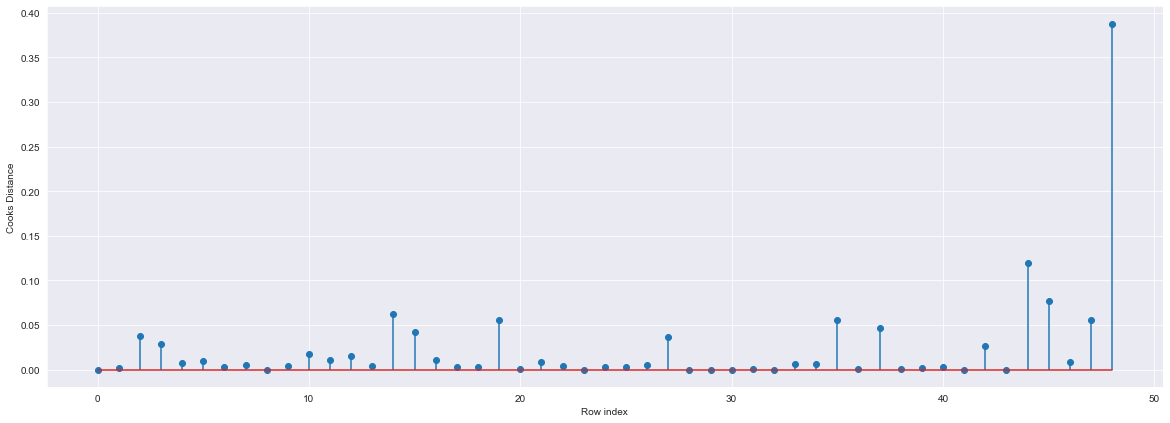

In [45]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')


Since the value is <1 , we can stop the diagnostic process and finalize the model

In [46]:
#Checking the accuracy of the model

final_Mrkt= smf.ols('Prft~RD+Mrkt+Adms',data = df2).fit()

In [47]:
final_Mrkt.rsquared, final_Mrkt.aic

(0.950656898239727, 1038.7428902329111)

In [48]:
# Model Prediction for new dataset
# New data for prediction
new_data=pd.DataFrame({"Mrkt":450000,"RD":60000,"Adms":95000},index=[1])
new_data

,Mrkt,RD,Adms
1,450000,60000,95000


In [49]:
final_Mrkt.predict(new_data)

1    108197.640136
dtype: float64

In [50]:
final_Mrkt.predict(df2.iloc[0:4,])

0    192530.591319
1    189165.423123
2    182141.898545
3    173693.647788
dtype: float64

In [51]:
pred_y = final_Mrkt.predict(df2)
pred_y

0     192530.591319
1     189165.423123
2     182141.898545
3     173693.647788
4     172128.462994
5     163573.970770
6     158077.937434
7     160018.403391
8     151740.245231
9     154872.732644
10    135491.227529
11    135555.639878
12    129129.603102
13    127482.304854
14    149539.973107
15    146221.650247
16    116912.729770
17    130192.965900
18    129010.993843
19    115593.413483
20    116641.498028
21    117329.398676
22    114712.147911
23    110000.246660
24    113335.403014
25    102221.977755
26    110582.062429
27    114423.088475
28    101649.859268
29    101776.778961
30     97667.766582
31     98968.600836
32     97906.724223
33     89044.722616
34     90500.709965
35     75288.627867
36     89600.571001
37     69686.614525
38     83714.824461
39     74811.889574
40     74790.111162
41     70608.955913
42     60146.126676
43     64593.198443
44     47627.728838
45     56190.016202
46     46470.065060
47     49132.748958
48     48198.090970
dtype: float64

### R^2 value for each prepared model

In [52]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_Mrkt.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.950657


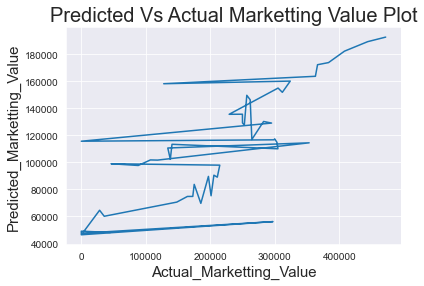

In [53]:
# Graph showing relation between Predicted and actual value

import matplotlib.pyplot as plt
df2.Mrkt # Actual Value
pred_y   # Predicted Value
plt.plot(df2.Mrkt,pred_y); plt.xlabel("Actual_Marketting_Value",size=15); plt.ylabel("Predicted_Marketting_Value",size = 15)
plt.title("Predicted Vs Actual Marketting Value Plot", size=20)
plt.show()